# WA Onboarding test
Have to draw lines over cones from an image

## environment setup
imports and all

In [641]:
import cv2 as cv
import matplotlib
plt = matplotlib.pyplot
matplotlib.rcParams['figure.dpi'] = 150
import math
import numpy as np
# from google.colab.patches import cv2_imshow

## method to display image for debugging

In [642]:
def cv2_imshow(img):
    RGB_im = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(RGB_im)
    plt.show()

## loading image and resizing
new resolution = 300 by 300

In [643]:
img = cv.imread("red.png")
scale_percent = 20 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
# sq = 300
# height, width = sq,sq

dim = (width, height)
# cv2_imshow(img)
  
# resize image
img = cv.resize(img, dim, interpolation = cv.INTER_AREA)

preview of scaled image

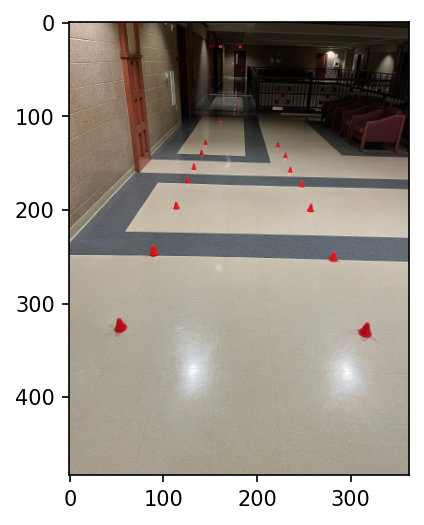

In [644]:
cv2_imshow(img)

## Filtering pixels of red color based on a threshold


In [645]:
for i in img:
  for j in i:
    t = sum(j)
    r = j[2]/t
    g = j[1]/t
    b = j[0]/t

    if r>0.6 and t>170:
      j[2] = 255
    else:
      j[2] = 0
    j[0] = 0
    j[1] = 0


C:\Users\Asus\AppData\Local\Temp\ipykernel_24384\2920166994.py:4: RuntimeWarning: invalid value encountered in long_scalars
  r = j[2]/t
C:\Users\Asus\AppData\Local\Temp\ipykernel_24384\2920166994.py:5: RuntimeWarning: invalid value encountered in long_scalars
  g = j[1]/t
C:\Users\Asus\AppData\Local\Temp\ipykernel_24384\2920166994.py:6: RuntimeWarning: invalid value encountered in long_scalars
  b = j[0]/t


preview of filtered image

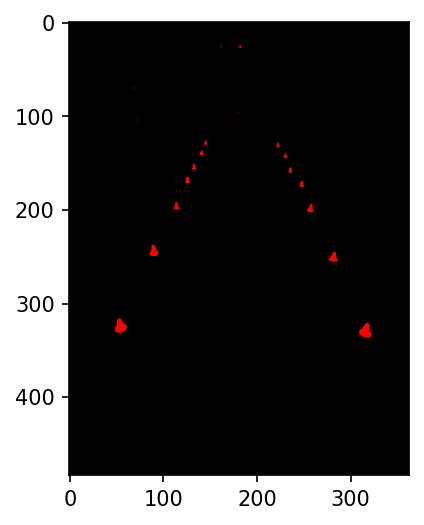

In [646]:
cv2_imshow(img)

## trying to iden

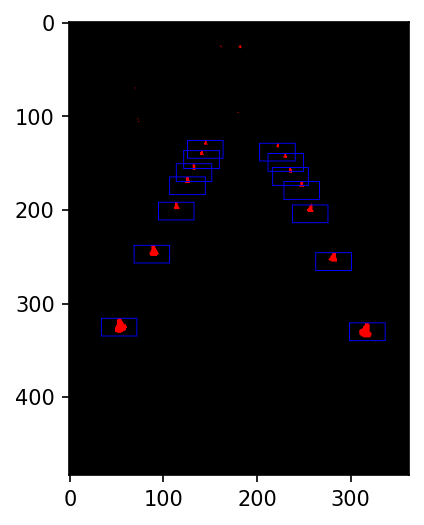

In [647]:
# make a grid on the image that is 25x25
temp = height//25
cones = []
for i in range(5, height-5):
    for j in range(5, width-5):
        # px = sum(img[i][j])//255
        px_left = sum(img[i][j-4])//255
        px_right = sum(img[i][j+4])//255
        px_up = sum([sum(img[i-e][j])//255 for e in range(6)])
        px_down = sum([sum(img[i+e][j])//255 for e in range(4)])
        # px_down_left = sum(img[i+1][j-1])//255
        # px_down_right = sum(img[i+1][j+1])//255

        if px_up == 1 and px_down == 4 and px_left == 0 and px_right == 0:
            cv.rectangle(img, (j-temp, i), (j+temp, i+temp), (255, 0, 0), 1)
            cones.append((j, i))
            
cv2_imshow(img)


## Now that I have the location of the cone I will try to draw lines according to them

In [648]:
lines = []
for i in cones:
  for j in cones:
    if i != j:
      x1 = i[0]
      y1 = i[1]
      x2 = j[0]
      y2 = j[1]
      tan = (y2-y1)/(x2-x1)
      lower_bound = math.tan(math.radians(50))
      upper_bound = math.tan(math.radians(90))
      # print(tan)

      if lower_bound < abs(tan) < upper_bound:
        lines.append([i,j,tan])

calculating angles for all cones and averaging them for better result

In [649]:
line1 = []
line2 = []

avg_tan_line1 = 0
avg_tan_line2 = 0
count1 = 0
count2 = 0
for i in lines:
    if i[2] > 0:
        line1.append(i)
        avg_tan_line1 += i[2]
        count1 += 1
    else:
        line2.append(i)
        avg_tan_line2 += i[2]
        count2 += 1
    
avg_tan_line1 /= count1
avg_tan_line2 /= count2

drawing the lines

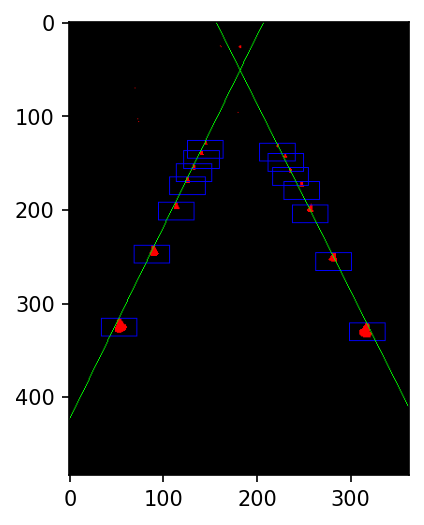

In [650]:
# take point in line1 and line2 with the highest y value and draw a line accoridng to the average tan
line1.sort(key=lambda x: x[0][1])
line2.sort(key=lambda x: x[0][1])

x1 = line1[-1][0][0]
y1 = line1[-1][0][1]
x2 = line2[-1][0][0]
y2 = line2[-1][0][1]

c1 = y1 - avg_tan_line1*x1
c2 = y2 - avg_tan_line2*x2

x1_next = 0 if avg_tan_line1 > 0 else width
y1_next = avg_tan_line1*x1_next + c1
x2_next = 0 if avg_tan_line2 > 0 else width
y2_next = avg_tan_line2*x2_next + c2

p1 = (int(x1), int(y1))
p1_next = (int(x1_next), int(y1_next))

p2 = (int(x2), int(y2))
p2_next = (int(x2_next), int(y2_next))

def extend_line(p1, p2, distance=10000):
    diff = np.arctan2(p1[1] - p2[1], p1[0] - p2[0])
    p3_x = int(p1[0] + distance*np.cos(diff))
    p3_y = int(p1[1] + distance*np.sin(diff))
    p4_x = int(p1[0] - distance*np.cos(diff))
    p4_y = int(p1[1] - distance*np.sin(diff))
    return ((p3_x, p3_y), (p4_x, p4_y))

p1, p1_next = extend_line(p1, p1_next)
p2, p2_next = extend_line(p2, p2_next)

# make line that extends to the edge of the image
cv.line(img, p1, p1_next, (0, 255, 0), 1)
cv.line(img, p2, p2_next, (0, 255, 0), 1)

cv2_imshow(img)

## refitting the lines on the original image

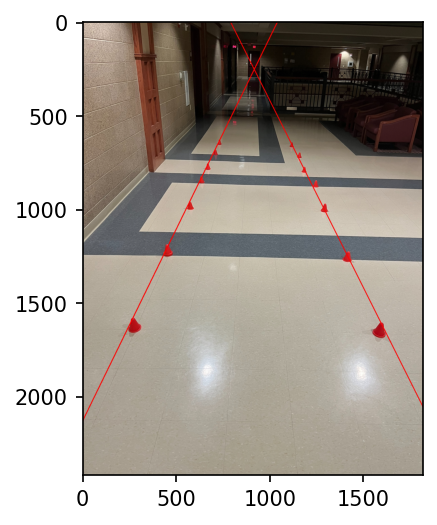

In [651]:
img_orig = cv.imread("red.png")
# img_orig = cv.resize(img_orig, dim, interpolation = cv.INTER_AREA)

height_orig, width_orig = img_orig.shape[:2]

# calculate the ratio of the new image to the old image
r = width_orig / float(width)

# draw the red line on the original image according to the ratio
cv.line(img_orig, (int(p1[0]*r), int(p1[1]*r)), (int(p1_next[0]*r), int(p1_next[1]*r)), (0, 0, 255), 3)
cv.line(img_orig, (int(p2[0]*r), int(p2[1]*r)), (int(p2_next[0]*r), int(p2_next[1]*r)), (0, 0, 255), 3)

cv2_imshow(img_orig)

## save image

In [652]:
cv.imwrite("answer.png", img_orig)

True